In [13]:
import pandas as pd
import cleaning_utils
import scipy
import geopandas as gpd
import os
import matplotlib.pyplot as plt                                                      

Data cleaning

In [3]:
df_sale,df_rent=cleaning_utils.step0()

Analysis 1: plotting quartiles

In [4]:
def x1000(col1, col2):
    if (col1<15000) & (col2>40):
        return 1000*col1
    else:
        return col1
    
df_sale['Cleaned Price'] = df_sale.apply(lambda row: x1000(row['Price'], 
  row['Living Area']), axis = 1) 

In [5]:
df_sale['province']= df_sale['zipcode'].map(cleaning_utils.postcode2province)

In [6]:
provinces=['Brussels','Walloon Brabant','FLemish Brabant',
    'Antwerp','FLemish Brabant','Limburg','Liege','Namur',
    'Hainaut','Luxemburg','Hainaut','West Flanders','East Flanders']

In [7]:
bins=df_sale['Cleaned Price'].quantile([0,0.25,0.5,0.75,1]).tolist()
data_dict=dict()
labels_dict=dict()
for province in ['Brussels','Walloon Brabant','FLemish Brabant',
    'Antwerp','FLemish Brabant','Limburg','Liege','Namur',
    'Hainaut','Luxemburg','Hainaut','West Flanders','East Flanders']:
    data_dict[province]=df_sale[df_sale['province']==province]['Cleaned Price'].value_counts(bins=bins, sort=False).tolist()
    labels_dict[province]=['q1','q2','q3','q4']

In [8]:
data_dict['dataset']=[1,1,1,1]
labels_dict['dataset']=['< 222k','222k-315k','315k-459k','> 459k']

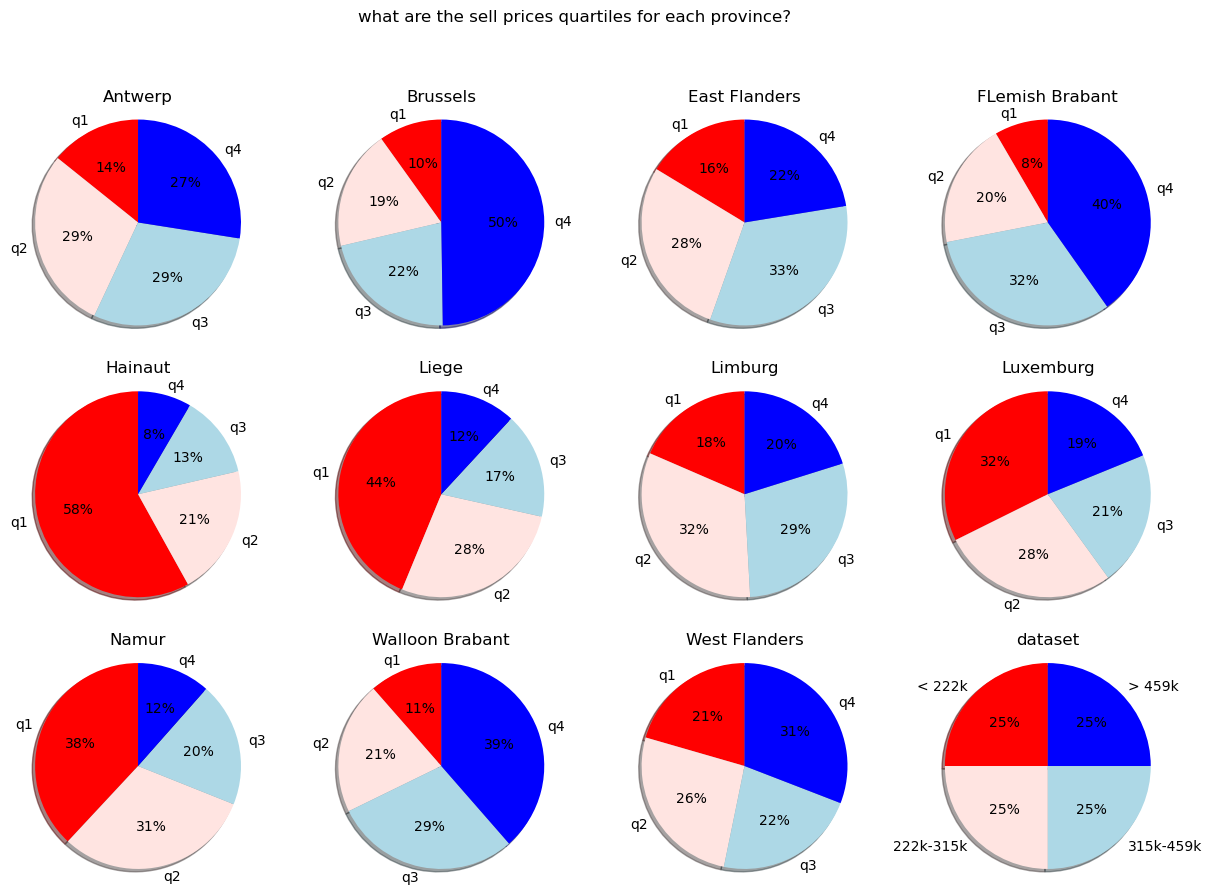

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mycolors = [mcolors.to_rgba('red'), mcolors.to_rgba('mistyrose'), mcolors.to_rgba('lightblue'), mcolors.to_rgba('blue')]

fig, ax = plt.subplots(3,4, figsize=(15,10))

row = 0
col = 0
for region in sorted(data_dict):
    ax[row,col].pie(data_dict[region],colors=mycolors,labels=labels_dict[region], autopct="%.0f%%", shadow=True, startangle=90)
    ax[row,col].set_title(region)
    ax[row,col].axis('equal')
    col+=1
    if col == 4:
        col=0
        row+=1
fig.suptitle("what are the sell prices quartiles for each province?")
plt.show()

Analysis2: geopanda hanlding

In [19]:
df_sale
df_sale[df_sale['Living Area']<40].describe()

,Living Area,Number of facades,Number of rooms,Price,Surface area of the plot of land,Surface of the land,zipcode,Cleaned Price
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,29.375000,2.361842,1.184211,135920.421053,86.236842,86.236842,4325.638158,135920.421053
std,7.341989,0.759482,1.187245,58688.792536,627.294039,627.294039,2659.097946,58688.792536
min,1.000000,1.000000,1.000000,1750.000000,0.000000,0.000000,1000.000000,1750.000000
25%,25.000000,2.000000,1.000000,99000.000000,0.000000,0.000000,2018.000000,99000.000000
50%,31.500000,2.000000,1.000000,127500.000000,0.000000,0.000000,3000.000000,127500.000000
75%,35.000000,3.000000,1.000000,168125.000000,0.000000,0.000000,7006.000000,168125.000000
max,39.000000,4.000000,15.000000,395000.000000,7000.000000,7000.000000,9150.000000,395000.000000


In [27]:
df_rent['province']= df_rent['zipcode'].map(cleaning_utils.postcode2province)
df_rent[df_rent['Price']<580].count()

Living Area              317
Number of facades        317
Number of rooms          317
Open fire                317
Price                    317
State of the building    317
Terrace                  317
type                     317
zipcode                  317
province                 317
dtype: int64

In [32]:
dic_rent=dict()
for key in ['Liege', 'FLemish Brabant', 'Hainaut', 'Luxemburg',
       'Walloon Brabant', 'Brussels', 'Namur', 'Antwerp', 'West Flanders',
       'Limburg', 'East Flanders']:
    dic_rent[key]=df_rent[(df_rent['province']==key)&(df_rent['Price']<580)]['Price'].count()

In [29]:
dic_rent

{'Liege': 94,
 'FLemish Brabant': 3,
 'Hainaut': 73,
 'Luxemburg': 15,
 'Walloon Brabant': 14,
 'Brussels': 3,
 'Namur': 36,
 'Antwerp': 14,
 'West Flanders': 50,
 'Limburg': 2,
 'East Flanders': 13}

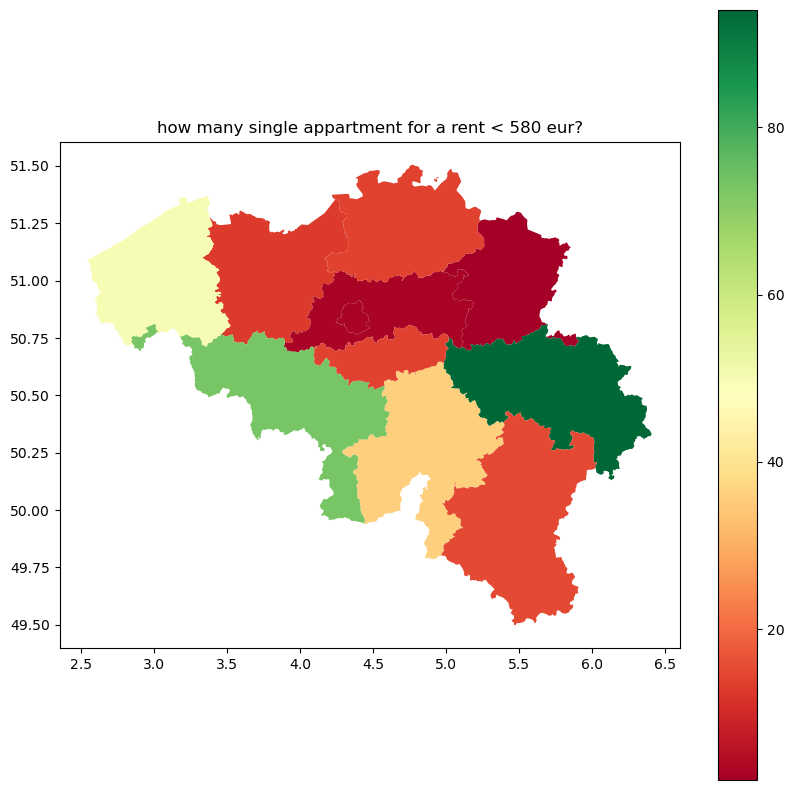

In [24]:
provinces=gpd.read_file('provinces-belges.geojson')
provinces['offers below 580 eur']=pd.DataFrame([13,3,3,36,50,2,14,94,73,15,14])

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the map
provinces.plot(column='offers below 580 eur', ax=ax, legend=True, cmap='RdYlGn')

# Set the title
ax.set_title('how many single appartment for a rent < 580 eur?')

# Show the plot
plt.show()